The Objetive of the NMF is Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X. This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [1]:
import numpy as np
from sklearn.decomposition import NMF

In [2]:
model = NMF(n_components=2,init='random',random_state=0) 
model

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=2, random_state=0, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [3]:
Original = np.array([
    [4,8,0,1], 
    [0,1,2,0],
    [1,0,1,0],
    [3,0,3,1],
    [0,2,0,1]
])
Original

array([[4, 8, 0, 1],
       [0, 1, 2, 0],
       [1, 0, 1, 0],
       [3, 0, 3, 1],
       [0, 2, 0, 1]])

In [4]:
W = model.fit_transform(Original)
W

array([[ 2.52863087,  0.09668108],
       [ 0.13816003,  0.69955496],
       [ 0.        ,  0.69145909],
       [ 0.01944055,  2.15684039],
       [ 0.54695354,  0.        ]])

In [5]:
H = model.components_
H
np.round(H)

array([[ 1.,  3.,  0.,  0.],
       [ 1.,  0.,  2.,  0.]])

In [6]:
prediction = np.dot(W,H)
print(prediction)

[[ 3.77292061  8.08224125  0.1470465   1.14825356]
 [ 1.06897405  0.47235012  1.0639839   0.31990881]
 [ 0.85933175  0.03062578  1.05167053  0.25612809]
 [ 2.70856189  0.15763449  3.28043338  0.80748264]
 [ 0.79010899  1.74729668  0.          0.24062574]]


In [7]:
np.round(prediction)

array([[ 4.,  8.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 3.,  0.,  3.,  1.],
       [ 1.,  2.,  0.,  0.]])

In [8]:
Original

array([[4, 8, 0, 1],
       [0, 1, 2, 0],
       [1, 0, 1, 0],
       [3, 0, 3, 1],
       [0, 2, 0, 1]])

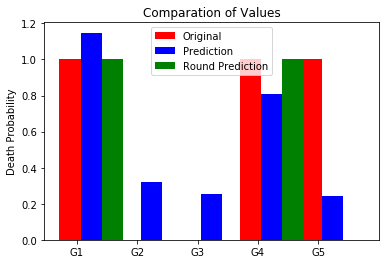

In [9]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last]), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Death Probability')
    ax.set_title('Comparation of Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('Original', 'Prediction','Round Prediction'))

    plt.show()

plotCompare(Original,prediction)

In [10]:
#Original Code from: 
#http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/
#Modified by DavidGutierrez
"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, K = 2, steps=5000, alpha=0.0002, beta=0.02):
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N,K)
    Q = np.random.rand(M,K).T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q

In [11]:
R = [
    [5,3,0,1],
    [4,0,0,1],
    [1,1,0,0],
    [1,0,0,1],
    [0,1,5,0]
]
R = np.array(R)

K = 3

nP, nQ = matrix_factorization(R,K)

In [12]:
nP

array([[ 1.20725867,  0.82889746,  1.71280586],
       [ 0.95979787,  0.86297567,  1.21127372],
       [ 0.51646896, -0.11576662,  0.41698086],
       [ 0.82173192,  0.30591482, -0.09543376],
       [ 0.74462956,  1.96922599,  0.59386786]])

In [13]:
nQ

array([[ 0.98991578,  0.89938033,  1.05142271,  0.63334275],
       [ 1.33151326, -0.18269492,  1.84861087,  0.54410462],
       [ 1.55453814,  1.19084281,  0.93999973, -0.07876654]])

In [14]:
prediction = np.dot(nP,nQ)
print(prediction)

[[ 4.96139441  2.97403189  4.41168508  1.08070368]
 [ 3.98215381  2.14799865  3.74305645  0.98202224]
 [ 1.00532865  0.98221067  0.72098166  0.23126858]
 [ 1.07241961  0.56951383  1.33979735  0.69440461]
 [ 4.28236131  1.01714086  4.98148862  1.49629378]]


In [15]:
np.round(prediction)

array([[ 5.,  3.,  4.,  1.],
       [ 4.,  2.,  4.,  1.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 4.,  1.,  5.,  1.]])

In [16]:
R

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 0],
       [1, 0, 0, 1],
       [0, 1, 5, 0]])

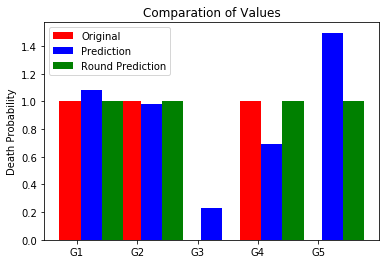

In [17]:
plotCompare(R,prediction)